## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 18s 370us/step - loss: 2.2613 - accuracy: 0.1576 - val_loss: 2.2082 - val_accuracy: 0.2058
Epoch 2/500
50000/50000 [==============================] - 19s 381us/step - loss: 2.1721 - accuracy: 0.2226 - val_loss: 2.1411 - val_accuracy: 0.2462
Epoch 3/500
50000/50000 [==============================] - 19s 373us/step - loss: 2.1127 - accuracy: 0.2512 - val_loss: 2.0901 - val_accuracy: 0.2603
Epoch 4/500
50000/50000 [==============================] - 19s 382us/step - loss: 2.0672 - accuracy: 0.2681 - val_loss: 2.0491 - val_accuracy: 0.2735
Epoch 5/500
50000/50000 [==============================] - 18s 365us/step - loss: 2.0295 - accuracy: 0.2822 - val_loss: 2.0155 - val_accuracy: 0.2858
Epoch 6/500
50000/50000 [==============================] - 18s 353us/step - loss: 1.9991 - accuracy: 0.2953 - val_loss: 1.9883 - val_accuracy: 0.2985
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 18s 357us/step - loss: 1.6525 - accuracy: 0.4258 - val_loss: 1.6612 - val_accuracy: 0.4182
Epoch 56/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.6491 - accuracy: 0.4267 - val_loss: 1.6623 - val_accuracy: 0.4160
Epoch 57/500
50000/50000 [==============================] - 16s 328us/step - loss: 1.6463 - accuracy: 0.4289 - val_loss: 1.6544 - val_accuracy: 0.4203
Epoch 58/500
50000/50000 [==============================] - 20s 401us/step - loss: 1.6430 - accuracy: 0.4301 - val_loss: 1.6514 - val_accuracy: 0.4213
Epoch 59/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.6400 - accuracy: 0.4298 - val_loss: 1.6548 - val_accuracy: 0.4174
Epoch 60/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.6371 - accuracy: 0.4316 - val_loss: 1.6457 - val_accuracy: 0.4226
Epoch 61/500
50000/50000 [==============================] - 21s 425us/step - loss: 1.6342 - ac

50000/50000 [==============================] - 18s 357us/step - loss: 1.5213 - accuracy: 0.4713 - val_loss: 1.5449 - val_accuracy: 0.4580
Epoch 110/500
50000/50000 [==============================] - 26s 513us/step - loss: 1.5193 - accuracy: 0.4712 - val_loss: 1.5458 - val_accuracy: 0.4558
Epoch 111/500
50000/50000 [==============================] - 21s 428us/step - loss: 1.5173 - accuracy: 0.4717 - val_loss: 1.5438 - val_accuracy: 0.4578
Epoch 112/500
50000/50000 [==============================] - 23s 467us/step - loss: 1.5155 - accuracy: 0.4720 - val_loss: 1.5388 - val_accuracy: 0.4591
Epoch 113/500
50000/50000 [==============================] - 17s 332us/step - loss: 1.5135 - accuracy: 0.4720 - val_loss: 1.5439 - val_accuracy: 0.4558
Epoch 114/500
50000/50000 [==============================] - 21s 426us/step - loss: 1.5117 - accuracy: 0.4726 - val_loss: 1.5400 - val_accuracy: 0.4596
Epoch 115/500
50000/50000 [==============================] - 21s 410us/step - loss: 1.5098 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 16s 329us/step - loss: 1.4295 - accuracy: 0.5010 - val_loss: 1.4809 - val_accuracy: 0.4747
Epoch 164/500
50000/50000 [==============================] - 20s 398us/step - loss: 1.4282 - accuracy: 0.5018 - val_loss: 1.4856 - val_accuracy: 0.4802
Epoch 165/500
50000/50000 [==============================] - 16s 329us/step - loss: 1.4265 - accuracy: 0.5018 - val_loss: 1.4845 - val_accuracy: 0.4755
Epoch 166/500
50000/50000 [==============================] - 21s 429us/step - loss: 1.4249 - accuracy: 0.5029 - val_loss: 1.4752 - val_accuracy: 0.4779
Epoch 167/500
50000/50000 [==============================] - 22s 444us/step - loss: 1.4234 - accuracy: 0.5019 - val_loss: 1.4765 - val_accuracy: 0.4758
Epoch 168/500
50000/50000 [==============================] - 18s 360us/step - loss: 1.4219 - accuracy: 0.5029 - val_loss: 1.4724 - val_accuracy: 0.4777
Epoch 169/500
50000/50000 [==============================] - 20s 403us/step - loss: 1.42

Epoch 217/500
50000/50000 [==============================] - 22s 445us/step - loss: 1.3511 - accuracy: 0.5279 - val_loss: 1.4287 - val_accuracy: 0.5005
Epoch 218/500
50000/50000 [==============================] - 19s 385us/step - loss: 1.3500 - accuracy: 0.5277 - val_loss: 1.4368 - val_accuracy: 0.4893
Epoch 219/500
50000/50000 [==============================] - 20s 397us/step - loss: 1.3484 - accuracy: 0.5277 - val_loss: 1.4281 - val_accuracy: 0.4937
Epoch 220/500
50000/50000 [==============================] - 20s 393us/step - loss: 1.3469 - accuracy: 0.5276 - val_loss: 1.4327 - val_accuracy: 0.4905
Epoch 221/500
50000/50000 [==============================] - 18s 359us/step - loss: 1.3457 - accuracy: 0.5280 - val_loss: 1.4317 - val_accuracy: 0.4915
Epoch 222/500
50000/50000 [==============================] - 21s 428us/step - loss: 1.3446 - accuracy: 0.5287 - val_loss: 1.4325 - val_accuracy: 0.4903
Epoch 223/500
50000/50000 [==============================] - 20s 392us/step - loss: 1.34

Epoch 271/500
50000/50000 [==============================] - 17s 330us/step - loss: 1.2816 - accuracy: 0.5514 - val_loss: 1.4165 - val_accuracy: 0.5020
Epoch 272/500
50000/50000 [==============================] - 21s 429us/step - loss: 1.2807 - accuracy: 0.5517 - val_loss: 1.4023 - val_accuracy: 0.5040
Epoch 273/500
50000/50000 [==============================] - 17s 333us/step - loss: 1.2797 - accuracy: 0.5520 - val_loss: 1.3866 - val_accuracy: 0.5104
Epoch 274/500
50000/50000 [==============================] - 24s 480us/step - loss: 1.2782 - accuracy: 0.5530 - val_loss: 1.4090 - val_accuracy: 0.5054
Epoch 275/500
50000/50000 [==============================] - 19s 372us/step - loss: 1.2762 - accuracy: 0.5537 - val_loss: 1.3851 - val_accuracy: 0.5088
Epoch 276/500
50000/50000 [==============================] - 23s 458us/step - loss: 1.2756 - accuracy: 0.5542 - val_loss: 1.3903 - val_accuracy: 0.5081
Epoch 277/500
50000/50000 [==============================] - 18s 355us/step - loss: 1.27

Epoch 325/500
50000/50000 [==============================] - 21s 412us/step - loss: 1.2193 - accuracy: 0.5738 - val_loss: 1.3656 - val_accuracy: 0.5153
Epoch 326/500
50000/50000 [==============================] - 19s 379us/step - loss: 1.2174 - accuracy: 0.5744 - val_loss: 1.3932 - val_accuracy: 0.5098
Epoch 327/500
50000/50000 [==============================] - 21s 416us/step - loss: 1.2166 - accuracy: 0.5744 - val_loss: 1.3957 - val_accuracy: 0.5048
Epoch 328/500
50000/50000 [==============================] - 20s 392us/step - loss: 1.2152 - accuracy: 0.5741 - val_loss: 1.3641 - val_accuracy: 0.5163
Epoch 329/500
50000/50000 [==============================] - 22s 440us/step - loss: 1.2153 - accuracy: 0.5743 - val_loss: 1.3623 - val_accuracy: 0.5188
Epoch 330/500
50000/50000 [==============================] - 16s 330us/step - loss: 1.2132 - accuracy: 0.5752 - val_loss: 1.3616 - val_accuracy: 0.5152
Epoch 331/500
50000/50000 [==============================] - 23s 459us/step - loss: 1.21

50000/50000 [==============================] - 18s 361us/step - loss: 1.1629 - accuracy: 0.5945 - val_loss: 1.3547 - val_accuracy: 0.5177
Epoch 379/500
50000/50000 [==============================] - 22s 440us/step - loss: 1.1611 - accuracy: 0.5949 - val_loss: 1.3745 - val_accuracy: 0.5152
Epoch 380/500
50000/50000 [==============================] - 19s 387us/step - loss: 1.1598 - accuracy: 0.5949 - val_loss: 1.3754 - val_accuracy: 0.5114
Epoch 381/500
50000/50000 [==============================] - 21s 425us/step - loss: 1.1594 - accuracy: 0.5943 - val_loss: 1.3410 - val_accuracy: 0.5266
Epoch 382/500
50000/50000 [==============================] - 22s 449us/step - loss: 1.1565 - accuracy: 0.5965 - val_loss: 1.3408 - val_accuracy: 0.5256
Epoch 383/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.1557 - accuracy: 0.5959 - val_loss: 1.3535 - val_accuracy: 0.5225
Epoch 384/500
50000/50000 [==============================] - 25s 493us/step - loss: 1.1559 - accuracy:

Epoch 432/500
50000/50000 [==============================] - 21s 422us/step - loss: 1.1071 - accuracy: 0.6146 - val_loss: 1.3811 - val_accuracy: 0.5182
Epoch 433/500
50000/50000 [==============================] - 22s 433us/step - loss: 1.1063 - accuracy: 0.6134 - val_loss: 1.3502 - val_accuracy: 0.5208
Epoch 434/500
50000/50000 [==============================] - 19s 379us/step - loss: 1.1045 - accuracy: 0.6141 - val_loss: 1.3635 - val_accuracy: 0.5225
Epoch 435/500
50000/50000 [==============================] - 23s 452us/step - loss: 1.1039 - accuracy: 0.6145 - val_loss: 1.3449 - val_accuracy: 0.5272
Epoch 436/500
50000/50000 [==============================] - 22s 432us/step - loss: 1.1003 - accuracy: 0.6157 - val_loss: 1.3585 - val_accuracy: 0.5175
Epoch 437/500
50000/50000 [==============================] - 18s 361us/step - loss: 1.1018 - accuracy: 0.6151 - val_loss: 1.3457 - val_accuracy: 0.5249
Epoch 438/500
50000/50000 [==============================] - 28s 555us/step - loss: 1.10

Epoch 486/500
50000/50000 [==============================] - 21s 420us/step - loss: 1.0522 - accuracy: 0.6331 - val_loss: 1.3306 - val_accuracy: 0.5331
Epoch 487/500
50000/50000 [==============================] - 18s 352us/step - loss: 1.0524 - accuracy: 0.6337 - val_loss: 1.3394 - val_accuracy: 0.5307
Epoch 488/500
50000/50000 [==============================] - 20s 406us/step - loss: 1.0489 - accuracy: 0.6361 - val_loss: 1.3656 - val_accuracy: 0.5213
Epoch 489/500
50000/50000 [==============================] - 20s 396us/step - loss: 1.0494 - accuracy: 0.6344 - val_loss: 1.3294 - val_accuracy: 0.5337
Epoch 490/500
50000/50000 [==============================] - 18s 363us/step - loss: 1.0519 - accuracy: 0.6341 - val_loss: 1.3413 - val_accuracy: 0.5266
Epoch 491/500
50000/50000 [==============================] - 21s 421us/step - loss: 1.0505 - accuracy: 0.6332 - val_loss: 1.3233 - val_accuracy: 0.5336
Epoch 492/500
50000/50000 [==============================] - 18s 362us/step - loss: 1.04

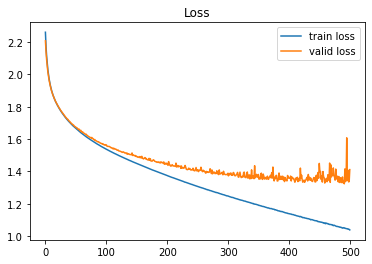

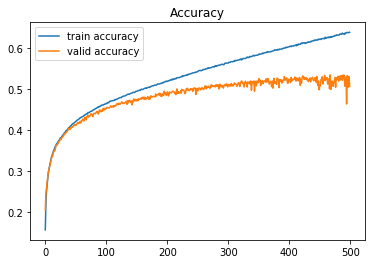

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()